In [2]:
import pandas as pd
import numpy as np
data_check = pd.read_csv('cheques_public.csv',delimiter=';')

[[26.  8. 18. ...  0.  0.  0.]
 [ 8. 10.  0. ...  0.  0.  0.]
 [18.  0. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  6.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


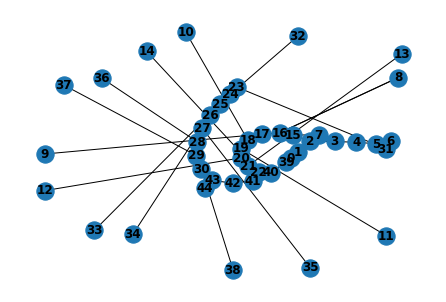

In [3]:
import scipy as sp
import networkx as nx
import numpy as np

step = 2
merged = 0

G = nx.MultiGraph()
G.add_edges_from(
    [
        (0, 1, {'weight': step * 4}),
        (0, 39, {'weight': step * 9}),
        (1, 2, {'weight': step}),
        (2, 3, {'weight': step}),
        (2, 15, {'weight': step}),
        (2, 7, {'weight': step}),
        (3, 4, {'weight': step}),
        (4, 5, {'weight': step}),
        (5, 6, {'weight': step}),
        (5, 31, {'weight': step}),
        (23, 31, {'weight': merged}),
        (23, 24, {'weight': step}),
        (24, 32, {'weight': merged}),
        (24, 25, {'weight': step}),
        (25, 33, {'weight': merged}),
        (25, 26, {'weight': step}),
        (26, 34, {'weight': merged}),
        (26, 27, {'weight': step}),
        (27, 35, {'weight': merged}),
        (27, 28, {'weight': step}),
        (28, 36, {'weight': merged}),
        (28, 29, {'weight': step}),
        (29, 37, {'weight': merged}),
        (29, 30, {'weight': step}),
        (30, 38, {'weight': merged}),
        (30, 43, {'weight': step}),
        (43, 44, {'weight': step}),
        (43, 42, {'weight': step}),
        (42, 41, {'weight': step}),
        (41, 40, {'weight': step}),
        (40, 39, {'weight': step}),
        (40, 22, {'weight': step}),
        (22, 21, {'weight': step}),
        (22, 14, {'weight': merged}),
        (21, 20, {'weight': step}),
        (21, 13, {'weight': merged}),
        (20, 19, {'weight': step}),
        (20, 12, {'weight': merged}),
        (19, 18, {'weight': step}),
        (19, 11, {'weight': merged}),
        (18, 17, {'weight': step}),
        (18, 10, {'weight': merged}),
        (17, 16, {'weight': step}),
        (17, 9, {'weight': merged}),
        (16, 15, {'weight': step}),
        (16, 8, {'weight': merged}),
        (16, 15, {'weight': step}),
        (16, 8, {'weight': merged}),
        (15, 7, {'weight': merged}),
    ]
)

'''

G = nx.MultiGraph()
G.add_edges_from(
    [
        (0, 1, {'weight': step * 4}),
        (0, 21, {'weight': step * 3}),
        (0, 23, {'weight': step * 6}),
        (0, 43, {'weight': step * 9}),
        (1, 2, {'weight': merged}),
        (4, 3, {'weight': merged}),
        (5, 6, {'weight': merged}),
        (8, 7, {'weight': merged}),
        (9, 10, {'weight': merged}),
        (16, 15, {'weight': merged}),
        (17, 18, {'weight': merged}),
        (19, 20, {'weight': merged}),
        (21, 22, {'weight': merged}),
        (29, 30, {'weight': merged}),
        (27, 28, {'weight': merged}),
        (25, 26, {'weight': merged}),
        (23, 24, {'weight': merged}),
        (35, 36, {'weight': merged}),
        (38, 37, {'weight': merged}),
        (39, 40, {'weight': merged}),
        (41, 42, {'weight': merged}),
        (43, 44, {'weight': merged}),
        (16, 15, {'weight': merged}),
        (1, 4, {'weight': step}),
        (4, 5, {'weight': step}),
        (5, 8, {'weight': step}),
        (8, 9, {'weight': step}),
        (9, 11, {'weight': step}),
        (11, 12, {'weight': step}),
        (12, 13, {'weight': step}),
        (13, 16, {'weight': step}),
        (16, 17, {'weight': step}),
        (17, 19, {'weight': step}),
        (19, 21, {'weight': step}),
        (13, 14, {'weight': step}),
        (14, 31, {'weight': step}),
        (31, 32, {'weight': step}),
        (32, 29, {'weight': step}),
        (29, 27, {'weight': step}),
        (27, 25, {'weight': step}),
        (25, 23, {'weight': step}),
        (32, 33, {'weight': step}),
        (33, 34, {'weight': step}),
        (34, 35, {'weight': step}),
        (35, 37, {'weight': step}),
        (37, 40, {'weight': step}),
        (40, 42, {'weight': step}),
        (42, 44, {'weight': step}),
    ]
)
'''
adj_matrix = nx.laplacian_matrix(G)

print(np.absolute(np.asarray(adj_matrix.todense())))
nx.draw(G, with_labels=True, font_weight='bold')

In [4]:
import pandas as pd
import numpy as np
import random
import networkx as nx

data_darkstore = pd.read_csv('darkstore_map.csv',delimiter=';')  
    
def simple_path_to_44(mass):
    final_mass = []
    path_len = 0
    
    ans = [nx.dijkstra_path_length(G, j, 0) for j in mass]
    ans1 = [nx.dijkstra_path(G, j, 0) for j in mass]
    
    zz = ans1[ans.index(min(ans))]
    if zz[0] != 0:
        zz.reverse()
    
    final_mass.append(zz)
    path_len += min(ans)
    
    par = zz[-1]
    while len(mass) != 1:
        mass.remove(par)
        ans = [nx.dijkstra_path_length(G, j, par) for j in mass]
        ans1 = [nx.dijkstra_path(G, j, par) for j in mass]    
        zz = ans1[ans.index(min(ans))]
        if zz[0] != par:
            zz.reverse()
        par = zz[-1]
        
        final_mass.append(zz[1:])
        path_len += min(ans)
        
    
    ans = [nx.dijkstra_path_length(G, 0, par) for j in mass]
    ans1 = [nx.dijkstra_path(G, 0, par) for j in mass]
    zz = ans1[ans.index(min(ans))]
    if zz[0] != par:
        zz.reverse()
    
    final_mass.append(zz[1:])
    path_len += min(ans)
    
    fin = []
    for jk in final_mass:
        for jo in jk:
            fin.append(jo)
            
    return np.asarray(fin).T, path_len

def get_matrix44():
    data_store = pd.DataFrame(np.random.randint(1,132,size=(44, 3)), columns=['1','2','3'])
    data_store.index += 1
    
    nn = [i for i in range(1,133)]
    random.shuffle(nn)
    data_store['1'] = nn[0:44]
    data_store['2'] = nn[44:88]
    data_store['3'] = nn[88:132]

    data_store = data_store.T
    return data_store

def get_number_of_position_shelf(itter,data_store):
    return int(data_store[data_store.eq(itter).any(1)].index[0])

def get_number_of_position_shelf2(itter,data_store):
    return (data_store.T[data_store.T.eq(itter).any(1)].index[0])

def replace_44(start, step, mass):
    mass2 = mass
    var1 = mass[start]
    var2 = mass[start+step]
    mass2[start+step] = var1
    mass2[start] = var2
    return mass2

In [5]:
def replace_44(start, step, mass):
    mass2 = mass
    var1 = mass[start]
    var2 = mass[start+step]
    mass2[start+step] = var1
    mass2[start] = var2
    return mass2

In [16]:
pd.options.mode.chained_assignment = None  # default='warn'

check_this_data = pd.read_csv('ans_main.csv',delimiter=';')
check_this_data_mass = check_this_data.LAGERID.tolist()
data_check = pd.read_csv('cheques_public.csv',delimiter=';')

kwak = np.array([[0,0,0]]*44)
counter = 0
for i in range(0,44):
    for j in range(0,3):
        kwak[i][j] = check_this_data_mass[counter]
        counter+=1

df = pd.DataFrame(kwak, columns = ['1','2','3'])
df.index += 1
df = df.T
data_store = df
all_cost = 0 
grouped = np.unique(data_check.CHEQUEID)

for i in grouped.tolist():
    mydata = data_check[data_check.CHEQUEID == i]
    arr = mydata.LAGERID.tolist()
    arr = [get_number_of_position_shelf2(ik,data_store) for ik in arr]

    ultra_ans = simple_path_to_44(arr)[1]
    mydata = mydata.reset_index()
    #print(mydata)
    for i in range(0,len(mydata)):
        mydata.KOLVO[i] = get_number_of_position_shelf(mydata.LAGERID[i],data_store)*mydata.KOLVO[i]

    ultra_ans += sum(mydata.KOLVO)
    print('ultra answer:')
    print(ultra_ans)

    all_cost += ultra_ans
    print('ans ',str(all_cost))

print(all_cost)

ultra answer:
95.0
ans  95.0
ultra answer:
87.0
ans  182.0
ultra answer:
53.0
ans  235.0
ultra answer:
43.0
ans  278.0
ultra answer:
47.0
ans  325.0
ultra answer:
75.0
ans  400.0
ultra answer:
62.0
ans  462.0
ultra answer:
39.0
ans  501.0
ultra answer:
22.0
ans  523.0
ultra answer:
78.0
ans  601.0
ultra answer:
93.0
ans  694.0
ultra answer:
83.0
ans  777.0
ultra answer:
31.0
ans  808.0
ultra answer:
82.0
ans  890.0
ultra answer:
100.0
ans  990.0
ultra answer:
52.0
ans  1042.0
ultra answer:
53.0
ans  1095.0
ultra answer:
71.0
ans  1166.0
ultra answer:
73.0
ans  1239.0
ultra answer:
91.0
ans  1330.0
ultra answer:
40.0
ans  1370.0
ultra answer:
22.0
ans  1392.0
ultra answer:
40.0
ans  1432.0
ultra answer:
78.0
ans  1510.0
ultra answer:
73.0
ans  1583.0
ultra answer:
57.0
ans  1640.0
ultra answer:
87.0
ans  1727.0
ultra answer:
34.0
ans  1761.0
ultra answer:
18.0
ans  1779.0
ultra answer:
55.0
ans  1834.0
ultra answer:
45.0
ans  1879.0
ultra answer:
49.0
ans  1928.0
ultra answer:
60.0
ans 

ultra answer:
88.0
ans  17242.0
ultra answer:
87.0
ans  17329.0
ultra answer:
74.0
ans  17403.0
ultra answer:
87.0
ans  17490.0
ultra answer:
109.0
ans  17599.0
ultra answer:
81.0
ans  17680.0
ultra answer:
100.0
ans  17780.0
ultra answer:
80.0
ans  17860.0
ultra answer:
39.0
ans  17899.0
ultra answer:
82.0
ans  17981.0
ultra answer:
85.0
ans  18066.0
ultra answer:
65.0
ans  18131.0
ultra answer:
67.0
ans  18198.0
ultra answer:
36.0
ans  18234.0
ultra answer:
77.0
ans  18311.0
ultra answer:
76.0
ans  18387.0
ultra answer:
99.0
ans  18486.0
ultra answer:
77.0
ans  18563.0
ultra answer:
68.0
ans  18631.0
ultra answer:
95.0
ans  18726.0
ultra answer:
88.0
ans  18814.0
ultra answer:
73.0
ans  18887.0
ultra answer:
84.0
ans  18971.0
ultra answer:
63.0
ans  19034.0
ultra answer:
77.0
ans  19111.0
ultra answer:
84.0
ans  19195.0
ultra answer:
79.0
ans  19274.0
ultra answer:
70.0
ans  19344.0
ultra answer:
67.0
ans  19411.0
ultra answer:
84.0
ans  19495.0
ultra answer:
91.0
ans  19586.0
ultra 

ultra answer:
100.0
ans  34016.0
ultra answer:
89.0
ans  34105.0
ultra answer:
107.0
ans  34212.0
ultra answer:
73.0
ans  34285.0
ultra answer:
59.0
ans  34344.0
ultra answer:
92.0
ans  34436.0
ultra answer:
75.0
ans  34511.0
ultra answer:
23.0
ans  34534.0
ultra answer:
58.0
ans  34592.0
ultra answer:
67.0
ans  34659.0
ultra answer:
28.0
ans  34687.0
ultra answer:
96.0
ans  34783.0
ultra answer:
51.0
ans  34834.0
ultra answer:
57.0
ans  34891.0
ultra answer:
38.0
ans  34929.0
ultra answer:
36.0
ans  34965.0
ultra answer:
57.0
ans  35022.0
ultra answer:
76.0
ans  35098.0
ultra answer:
47.0
ans  35145.0
ultra answer:
83.0
ans  35228.0
ultra answer:
32.0
ans  35260.0
ultra answer:
29.0
ans  35289.0
ultra answer:
77.0
ans  35366.0
ultra answer:
30.0
ans  35396.0
ultra answer:
109.0
ans  35505.0
ultra answer:
81.0
ans  35586.0
ultra answer:
84.0
ans  35670.0
ultra answer:
97.0
ans  35767.0
ultra answer:
109.0
ans  35876.0
ultra answer:
80.0
ans  35956.0
ultra answer:
69.0
ans  36025.0
ultr

ultra answer:
82.0
ans  51288.0
ultra answer:
59.0
ans  51347.0
ultra answer:
74.0
ans  51421.0
ultra answer:
27.0
ans  51448.0
ultra answer:
58.0
ans  51506.0
ultra answer:
81.0
ans  51587.0
ultra answer:
54.0
ans  51641.0
ultra answer:
83.0
ans  51724.0
ultra answer:
96.0
ans  51820.0
ultra answer:
38.0
ans  51858.0
ultra answer:
74.0
ans  51932.0
ultra answer:
46.0
ans  51978.0
ultra answer:
72.0
ans  52050.0
ultra answer:
37.0
ans  52087.0
ultra answer:
32.0
ans  52119.0
ultra answer:
42.0
ans  52161.0
ultra answer:
63.0
ans  52224.0
ultra answer:
61.0
ans  52285.0
ultra answer:
81.0
ans  52366.0
ultra answer:
78.0
ans  52444.0
ultra answer:
60.0
ans  52504.0
ultra answer:
42.0
ans  52546.0
ultra answer:
34.0
ans  52580.0
ultra answer:
78.0
ans  52658.0
ultra answer:
70.0
ans  52728.0
ultra answer:
48.0
ans  52776.0
ultra answer:
66.0
ans  52842.0
ultra answer:
63.0
ans  52905.0
ultra answer:
78.0
ans  52983.0
ultra answer:
51.0
ans  53034.0
ultra answer:
71.0
ans  53105.0
ultra an

ultra answer:
92.0
ans  69159.0
ultra answer:
59.0
ans  69218.0
ultra answer:
73.0
ans  69291.0
ultra answer:
27.0
ans  69318.0
ultra answer:
52.0
ans  69370.0
ultra answer:
77.0
ans  69447.0
ultra answer:
63.0
ans  69510.0
ultra answer:
44.0
ans  69554.0
ultra answer:
88.0
ans  69642.0
ultra answer:
34.0
ans  69676.0
ultra answer:
78.0
ans  69754.0
ultra answer:
84.0
ans  69838.0
ultra answer:
41.0
ans  69879.0
ultra answer:
100.0
ans  69979.0
ultra answer:
34.0
ans  70013.0
ultra answer:
87.0
ans  70100.0
ultra answer:
92.0
ans  70192.0
ultra answer:
40.0
ans  70232.0
ultra answer:
34.0
ans  70266.0
ultra answer:
34.0
ans  70300.0
ultra answer:
81.0
ans  70381.0
ultra answer:
54.0
ans  70435.0
ultra answer:
89.0
ans  70524.0
ultra answer:
65.0
ans  70589.0
ultra answer:
98.0
ans  70687.0
ultra answer:
78.0
ans  70765.0
ultra answer:
59.0
ans  70824.0
ultra answer:
78.0
ans  70902.0
ultra answer:
18.0
ans  70920.0
ultra answer:
20.0
ans  70940.0
ultra answer:
37.0
ans  70977.0
ultra a

ultra answer:
68.0
ans  85785.0
ultra answer:
89.0
ans  85874.0
ultra answer:
93.0
ans  85967.0
ultra answer:
52.0
ans  86019.0
ultra answer:
38.0
ans  86057.0
ultra answer:
71.0
ans  86128.0
ultra answer:
43.0
ans  86171.0
ultra answer:
81.0
ans  86252.0
ultra answer:
75.0
ans  86327.0
ultra answer:
86.0
ans  86413.0
ultra answer:
76.0
ans  86489.0
ultra answer:
36.0
ans  86525.0
ultra answer:
94.0
ans  86619.0
ultra answer:
80.0
ans  86699.0
ultra answer:
84.0
ans  86783.0
ultra answer:
56.0
ans  86839.0
ultra answer:
22.0
ans  86861.0
ultra answer:
85.0
ans  86946.0
ultra answer:
87.0
ans  87033.0
ultra answer:
86.0
ans  87119.0
ultra answer:
55.0
ans  87174.0
ultra answer:
50.0
ans  87224.0
ultra answer:
74.0
ans  87298.0
ultra answer:
25.0
ans  87323.0
ultra answer:
36.0
ans  87359.0
ultra answer:
50.0
ans  87409.0
ultra answer:
26.0
ans  87435.0
ultra answer:
80.0
ans  87515.0
ultra answer:
20.0
ans  87535.0
ultra answer:
83.0
ans  87618.0
ultra answer:
38.0
ans  87656.0
ultra an

ultra answer:
61.0
ans  103106.0
ultra answer:
69.0
ans  103175.0
ultra answer:
39.0
ans  103214.0
ultra answer:
90.0
ans  103304.0
ultra answer:
38.0
ans  103342.0
ultra answer:
74.0
ans  103416.0
ultra answer:
32.0
ans  103448.0
ultra answer:
32.0
ans  103480.0
ultra answer:
50.0
ans  103530.0
ultra answer:
47.0
ans  103577.0
ultra answer:
45.0
ans  103622.0
ultra answer:
21.0
ans  103643.0
ultra answer:
40.0
ans  103683.0
ultra answer:
42.0
ans  103725.0
ultra answer:
74.0
ans  103799.0
ultra answer:
73.0
ans  103872.0
ultra answer:
40.0
ans  103912.0
ultra answer:
30.0
ans  103942.0
ultra answer:
58.0
ans  104000.0
ultra answer:
76.0
ans  104076.0
ultra answer:
85.0
ans  104161.0
ultra answer:
44.0
ans  104205.0
ultra answer:
93.0
ans  104298.0
ultra answer:
78.0
ans  104376.0
ultra answer:
99.0
ans  104475.0
ultra answer:
22.0
ans  104497.0
ultra answer:
104.0
ans  104601.0
ultra answer:
46.0
ans  104647.0
ultra answer:
78.0
ans  104725.0
ultra answer:
27.0
ans  104752.0
ultra ans

ultra answer:
79.0
ans  120230.0
ultra answer:
61.0
ans  120291.0
ultra answer:
108.0
ans  120399.0
ultra answer:
108.0
ans  120507.0
ultra answer:
99.0
ans  120606.0
ultra answer:
44.0
ans  120650.0
ultra answer:
85.0
ans  120735.0
ultra answer:
84.0
ans  120819.0
ultra answer:
51.0
ans  120870.0
ultra answer:
97.0
ans  120967.0
ultra answer:
46.0
ans  121013.0
ultra answer:
79.0
ans  121092.0
ultra answer:
85.0
ans  121177.0
ultra answer:
53.0
ans  121230.0
ultra answer:
49.0
ans  121279.0
ultra answer:
79.0
ans  121358.0
ultra answer:
64.0
ans  121422.0
ultra answer:
90.0
ans  121512.0
ultra answer:
104.0
ans  121616.0
ultra answer:
46.0
ans  121662.0
ultra answer:
34.0
ans  121696.0
ultra answer:
40.0
ans  121736.0
ultra answer:
104.0
ans  121840.0
ultra answer:
18.0
ans  121858.0
ultra answer:
92.0
ans  121950.0
ultra answer:
70.0
ans  122020.0
ultra answer:
84.0
ans  122104.0
ultra answer:
108.0
ans  122212.0
ultra answer:
62.0
ans  122274.0
ultra answer:
54.0
ans  122328.0
ultra

ultra answer:
47.0
ans  137646.0
ultra answer:
92.0
ans  137738.0
ultra answer:
81.0
ans  137819.0
ultra answer:
46.0
ans  137865.0
ultra answer:
56.0
ans  137921.0
ultra answer:
65.0
ans  137986.0
ultra answer:
89.0
ans  138075.0
ultra answer:
63.0
ans  138138.0
ultra answer:
64.0
ans  138202.0
ultra answer:
73.0
ans  138275.0
ultra answer:
101.0
ans  138376.0
ultra answer:
28.0
ans  138404.0
ultra answer:
100.0
ans  138504.0
ultra answer:
72.0
ans  138576.0
ultra answer:
96.0
ans  138672.0
ultra answer:
35.0
ans  138707.0
ultra answer:
59.0
ans  138766.0
ultra answer:
37.0
ans  138803.0
ultra answer:
38.0
ans  138841.0
ultra answer:
37.0
ans  138878.0
ultra answer:
37.0
ans  138915.0
ultra answer:
34.0
ans  138949.0
ultra answer:
71.0
ans  139020.0
ultra answer:
54.0
ans  139074.0
ultra answer:
76.0
ans  139150.0
ultra answer:
49.0
ans  139199.0
ultra answer:
36.0
ans  139235.0
ultra answer:
58.0
ans  139293.0
ultra answer:
53.0
ans  139346.0
ultra answer:
72.0
ans  139418.0
ultra an

ultra answer:
71.0
ans  154857.0
ultra answer:
21.0
ans  154878.0
ultra answer:
84.0
ans  154962.0
ultra answer:
21.0
ans  154983.0
ultra answer:
91.0
ans  155074.0
ultra answer:
38.0
ans  155112.0
ultra answer:
81.0
ans  155193.0
ultra answer:
29.0
ans  155222.0
ultra answer:
89.0
ans  155311.0
ultra answer:
34.0
ans  155345.0
ultra answer:
76.0
ans  155421.0
ultra answer:
54.0
ans  155475.0
ultra answer:
55.0
ans  155530.0
ultra answer:
88.0
ans  155618.0
ultra answer:
35.0
ans  155653.0
ultra answer:
53.0
ans  155706.0
ultra answer:
76.0
ans  155782.0
ultra answer:
53.0
ans  155835.0
ultra answer:
37.0
ans  155872.0
ultra answer:
82.0
ans  155954.0
ultra answer:
77.0
ans  156031.0
ultra answer:
75.0
ans  156106.0
ultra answer:
77.0
ans  156183.0
ultra answer:
60.0
ans  156243.0
ultra answer:
86.0
ans  156329.0
ultra answer:
90.0
ans  156419.0
ultra answer:
60.0
ans  156479.0
ultra answer:
89.0
ans  156568.0
ultra answer:
76.0
ans  156644.0
ultra answer:
43.0
ans  156687.0
ultra answ

ultra answer:
77.0
ans  172176.0
ultra answer:
88.0
ans  172264.0
ultra answer:
18.0
ans  172282.0
ultra answer:
68.0
ans  172350.0
ultra answer:
18.0
ans  172368.0
ultra answer:
38.0
ans  172406.0
ultra answer:
45.0
ans  172451.0
ultra answer:
37.0
ans  172488.0
ultra answer:
48.0
ans  172536.0
ultra answer:
35.0
ans  172571.0
ultra answer:
75.0
ans  172646.0
ultra answer:
48.0
ans  172694.0
ultra answer:
36.0
ans  172730.0
ultra answer:
51.0
ans  172781.0
ultra answer:
64.0
ans  172845.0
ultra answer:
53.0
ans  172898.0
ultra answer:
58.0
ans  172956.0
ultra answer:
74.0
ans  173030.0
ultra answer:
64.0
ans  173094.0
ultra answer:
72.0
ans  173166.0
ultra answer:
81.0
ans  173247.0
ultra answer:
62.0
ans  173309.0
ultra answer:
100.0
ans  173409.0
ultra answer:
86.0
ans  173495.0
ultra answer:
52.0
ans  173547.0
ultra answer:
67.0
ans  173614.0
ultra answer:
59.0
ans  173673.0
ultra answer:
31.0
ans  173704.0
ultra answer:
79.0
ans  173783.0
ultra answer:
101.0
ans  173884.0
ultra an

ultra answer:
96.0
ans  188611.0
ultra answer:
69.0
ans  188680.0
ultra answer:
81.0
ans  188761.0
ultra answer:
92.0
ans  188853.0
ultra answer:
88.0
ans  188941.0
ultra answer:
81.0
ans  189022.0
ultra answer:
69.0
ans  189091.0
ultra answer:
75.0
ans  189166.0
ultra answer:
79.0
ans  189245.0
ultra answer:
25.0
ans  189270.0
ultra answer:
86.0
ans  189356.0
ultra answer:
94.0
ans  189450.0
ultra answer:
38.0
ans  189488.0
ultra answer:
22.0
ans  189510.0
ultra answer:
39.0
ans  189549.0
ultra answer:
25.0
ans  189574.0
ultra answer:
81.0
ans  189655.0
ultra answer:
48.0
ans  189703.0
ultra answer:
35.0
ans  189738.0
ultra answer:
26.0
ans  189764.0
ultra answer:
42.0
ans  189806.0
ultra answer:
50.0
ans  189856.0
ultra answer:
69.0
ans  189925.0
ultra answer:
49.0
ans  189974.0
ultra answer:
61.0
ans  190035.0
ultra answer:
82.0
ans  190117.0
ultra answer:
94.0
ans  190211.0
ultra answer:
81.0
ans  190292.0
ultra answer:
67.0
ans  190359.0
ultra answer:
109.0
ans  190468.0
ultra ans

ultra answer:
98.0
ans  205570.0
ultra answer:
21.0
ans  205591.0
ultra answer:
87.0
ans  205678.0
ultra answer:
89.0
ans  205767.0
ultra answer:
86.0
ans  205853.0
ultra answer:
110.0
ans  205963.0
ultra answer:
67.0
ans  206030.0
ultra answer:
40.0
ans  206070.0
ultra answer:
53.0
ans  206123.0
ultra answer:
67.0
ans  206190.0
ultra answer:
72.0
ans  206262.0
ultra answer:
35.0
ans  206297.0
ultra answer:
83.0
ans  206380.0
ultra answer:
106.0
ans  206486.0
ultra answer:
41.0
ans  206527.0
ultra answer:
26.0
ans  206553.0
ultra answer:
68.0
ans  206621.0
ultra answer:
56.0
ans  206677.0
ultra answer:
93.0
ans  206770.0
ultra answer:
73.0
ans  206843.0
ultra answer:
21.0
ans  206864.0
ultra answer:
35.0
ans  206899.0
ultra answer:
93.0
ans  206992.0
ultra answer:
69.0
ans  207061.0
ultra answer:
108.0
ans  207169.0
ultra answer:
39.0
ans  207208.0
ultra answer:
42.0
ans  207250.0
ultra answer:
51.0
ans  207301.0
ultra answer:
43.0
ans  207344.0
ultra answer:
34.0
ans  207378.0
ultra a

ultra answer:
89.0
ans  222241.0
ultra answer:
104.0
ans  222345.0
ultra answer:
48.0
ans  222393.0
ultra answer:
89.0
ans  222482.0
ultra answer:
22.0
ans  222504.0
ultra answer:
51.0
ans  222555.0
ultra answer:
92.0
ans  222647.0
ultra answer:
131.0
ans  222778.0
ultra answer:
87.0
ans  222865.0
ultra answer:
75.0
ans  222940.0
ultra answer:
91.0
ans  223031.0
ultra answer:
53.0
ans  223084.0
ultra answer:
54.0
ans  223138.0
ultra answer:
80.0
ans  223218.0
ultra answer:
93.0
ans  223311.0
ultra answer:
77.0
ans  223388.0
ultra answer:
37.0
ans  223425.0
ultra answer:
113.0
ans  223538.0
ultra answer:
99.0
ans  223637.0
ultra answer:
47.0
ans  223684.0
ultra answer:
26.0
ans  223710.0
ultra answer:
57.0
ans  223767.0
ultra answer:
59.0
ans  223826.0
ultra answer:
72.0
ans  223898.0
ultra answer:
92.0
ans  223990.0
ultra answer:
30.0
ans  224020.0
ultra answer:
34.0
ans  224054.0
ultra answer:
81.0
ans  224135.0
ultra answer:
47.0
ans  224182.0
ultra answer:
28.0
ans  224210.0
ultra a

ultra answer:
92.0
ans  238782.0
ultra answer:
84.0
ans  238866.0
ultra answer:
103.0
ans  238969.0
ultra answer:
41.0
ans  239010.0
ultra answer:
81.0
ans  239091.0
ultra answer:
69.0
ans  239160.0
ultra answer:
81.0
ans  239241.0
ultra answer:
68.0
ans  239309.0
ultra answer:
85.0
ans  239394.0
ultra answer:
83.0
ans  239477.0
ultra answer:
72.0
ans  239549.0
ultra answer:
75.0
ans  239624.0
ultra answer:
62.0
ans  239686.0
ultra answer:
60.0
ans  239746.0
ultra answer:
89.0
ans  239835.0
ultra answer:
73.0
ans  239908.0
ultra answer:
77.0
ans  239985.0
ultra answer:
50.0
ans  240035.0
ultra answer:
43.0
ans  240078.0
ultra answer:
66.0
ans  240144.0
ultra answer:
63.0
ans  240207.0
ultra answer:
74.0
ans  240281.0
ultra answer:
85.0
ans  240366.0
ultra answer:
84.0
ans  240450.0
ultra answer:
48.0
ans  240498.0
ultra answer:
81.0
ans  240579.0
ultra answer:
84.0
ans  240663.0
ultra answer:
94.0
ans  240757.0
ultra answer:
91.0
ans  240848.0
ultra answer:
83.0
ans  240931.0
ultra ans

ultra answer:
82.0
ans  255799.0
ultra answer:
81.0
ans  255880.0
ultra answer:
79.0
ans  255959.0
ultra answer:
76.0
ans  256035.0
ultra answer:
50.0
ans  256085.0
ultra answer:
85.0
ans  256170.0
ultra answer:
43.0
ans  256213.0
ultra answer:
82.0
ans  256295.0
ultra answer:
62.0
ans  256357.0
ultra answer:
126.0
ans  256483.0
ultra answer:
83.0
ans  256566.0
ultra answer:
67.0
ans  256633.0
ultra answer:
47.0
ans  256680.0
ultra answer:
76.0
ans  256756.0
ultra answer:
84.0
ans  256840.0
ultra answer:
58.0
ans  256898.0
ultra answer:
81.0
ans  256979.0
ultra answer:
65.0
ans  257044.0
ultra answer:
38.0
ans  257082.0
ultra answer:
67.0
ans  257149.0
ultra answer:
71.0
ans  257220.0
ultra answer:
78.0
ans  257298.0
ultra answer:
103.0
ans  257401.0
ultra answer:
85.0
ans  257486.0
ultra answer:
91.0
ans  257577.0
ultra answer:
63.0
ans  257640.0
ultra answer:
68.0
ans  257708.0
ultra answer:
28.0
ans  257736.0
ultra answer:
56.0
ans  257792.0
ultra answer:
49.0
ans  257841.0
ultra an

ultra answer:
122.0
ans  272408.0
ultra answer:
37.0
ans  272445.0
ultra answer:
70.0
ans  272515.0
ultra answer:
122.0
ans  272637.0
ultra answer:
46.0
ans  272683.0
ultra answer:
59.0
ans  272742.0
ultra answer:
77.0
ans  272819.0
ultra answer:
38.0
ans  272857.0
ultra answer:
41.0
ans  272898.0
ultra answer:
99.0
ans  272997.0
ultra answer:
38.0
ans  273035.0
ultra answer:
85.0
ans  273120.0
ultra answer:
51.0
ans  273171.0
ultra answer:
43.0
ans  273214.0
ultra answer:
49.0
ans  273263.0
ultra answer:
91.0
ans  273354.0
ultra answer:
53.0
ans  273407.0
ultra answer:
62.0
ans  273469.0
ultra answer:
67.0
ans  273536.0
ultra answer:
38.0
ans  273574.0
ultra answer:
70.0
ans  273644.0
ultra answer:
68.0
ans  273712.0
ultra answer:
80.0
ans  273792.0
ultra answer:
69.0
ans  273861.0
ultra answer:
86.0
ans  273947.0
ultra answer:
52.0
ans  273999.0
ultra answer:
66.0
ans  274065.0
ultra answer:
37.0
ans  274102.0
ultra answer:
45.0
ans  274147.0
ultra answer:
75.0
ans  274222.0
ultra an

ultra answer:
27.0
ans  288759.0
ultra answer:
63.0
ans  288822.0
ultra answer:
64.0
ans  288886.0
ultra answer:
44.0
ans  288930.0
ultra answer:
74.0
ans  289004.0
ultra answer:
98.0
ans  289102.0
ultra answer:
36.0
ans  289138.0
ultra answer:
72.0
ans  289210.0
ultra answer:
73.0
ans  289283.0
ultra answer:
82.0
ans  289365.0
ultra answer:
93.0
ans  289458.0
ultra answer:
89.0
ans  289547.0
ultra answer:
37.0
ans  289584.0
ultra answer:
79.0
ans  289663.0
ultra answer:
89.0
ans  289752.0
ultra answer:
94.0
ans  289846.0
ultra answer:
68.0
ans  289914.0
ultra answer:
85.0
ans  289999.0
ultra answer:
72.0
ans  290071.0
ultra answer:
69.0
ans  290140.0
ultra answer:
65.0
ans  290205.0
ultra answer:
94.0
ans  290299.0
ultra answer:
56.0
ans  290355.0
ultra answer:
43.0
ans  290398.0
ultra answer:
93.0
ans  290491.0
ultra answer:
65.0
ans  290556.0
ultra answer:
48.0
ans  290604.0
ultra answer:
82.0
ans  290686.0
ultra answer:
34.0
ans  290720.0
ultra answer:
61.0
ans  290781.0
ultra answ

ultra answer:
82.0
ans  305485.0
ultra answer:
64.0
ans  305549.0
ultra answer:
84.0
ans  305633.0
ultra answer:
101.0
ans  305734.0
ultra answer:
86.0
ans  305820.0
ultra answer:
42.0
ans  305862.0
ultra answer:
78.0
ans  305940.0
ultra answer:
44.0
ans  305984.0
ultra answer:
39.0
ans  306023.0
ultra answer:
55.0
ans  306078.0
ultra answer:
84.0
ans  306162.0
ultra answer:
95.0
ans  306257.0
ultra answer:
74.0
ans  306331.0
ultra answer:
101.0
ans  306432.0
ultra answer:
48.0
ans  306480.0
ultra answer:
77.0
ans  306557.0
ultra answer:
39.0
ans  306596.0
ultra answer:
60.0
ans  306656.0
ultra answer:
65.0
ans  306721.0
ultra answer:
43.0
ans  306764.0
ultra answer:
36.0
ans  306800.0
ultra answer:
92.0
ans  306892.0
ultra answer:
87.0
ans  306979.0
ultra answer:
65.0
ans  307044.0
ultra answer:
75.0
ans  307119.0
ultra answer:
42.0
ans  307161.0
ultra answer:
64.0
ans  307225.0
ultra answer:
81.0
ans  307306.0
ultra answer:
99.0
ans  307405.0
ultra answer:
47.0
ans  307452.0
ultra an

ultra answer:
94.0
ans  322333.0
ultra answer:
21.0
ans  322354.0
ultra answer:
38.0
ans  322392.0
ultra answer:
101.0
ans  322493.0
ultra answer:
57.0
ans  322550.0
ultra answer:
85.0
ans  322635.0
ultra answer:
62.0
ans  322697.0
ultra answer:
31.0
ans  322728.0
ultra answer:
81.0
ans  322809.0
ultra answer:
88.0
ans  322897.0
ultra answer:
112.0
ans  323009.0
ultra answer:
103.0
ans  323112.0
ultra answer:
49.0
ans  323161.0
ultra answer:
63.0
ans  323224.0
ultra answer:
69.0
ans  323293.0
ultra answer:
37.0
ans  323330.0
ultra answer:
35.0
ans  323365.0
ultra answer:
87.0
ans  323452.0
ultra answer:
50.0
ans  323502.0
ultra answer:
64.0
ans  323566.0
ultra answer:
49.0
ans  323615.0
ultra answer:
69.0
ans  323684.0
ultra answer:
115.0
ans  323799.0
ultra answer:
66.0
ans  323865.0
ultra answer:
42.0
ans  323907.0
ultra answer:
88.0
ans  323995.0
ultra answer:
54.0
ans  324049.0
ultra answer:
58.0
ans  324107.0
ultra answer:
28.0
ans  324135.0
ultra answer:
27.0
ans  324162.0
ultra 

ultra answer:
93.0
ans  339129.0
ultra answer:
59.0
ans  339188.0
ultra answer:
27.0
ans  339215.0
ultra answer:
77.0
ans  339292.0
ultra answer:
87.0
ans  339379.0
ultra answer:
25.0
ans  339404.0
ultra answer:
57.0
ans  339461.0
ultra answer:
100.0
ans  339561.0
ultra answer:
26.0
ans  339587.0
ultra answer:
26.0
ans  339613.0
ultra answer:
83.0
ans  339696.0
ultra answer:
38.0
ans  339734.0
ultra answer:
17.0
ans  339751.0
ultra answer:
82.0
ans  339833.0
ultra answer:
22.0
ans  339855.0
ultra answer:
57.0
ans  339912.0
ultra answer:
45.0
ans  339957.0
ultra answer:
62.0
ans  340019.0
ultra answer:
64.0
ans  340083.0
ultra answer:
66.0
ans  340149.0
ultra answer:
27.0
ans  340176.0
ultra answer:
35.0
ans  340211.0
ultra answer:
73.0
ans  340284.0
ultra answer:
85.0
ans  340369.0
ultra answer:
80.0
ans  340449.0
ultra answer:
66.0
ans  340515.0
ultra answer:
50.0
ans  340565.0
ultra answer:
80.0
ans  340645.0
ultra answer:
38.0
ans  340683.0
ultra answer:
68.0
ans  340751.0
ultra ans

ultra answer:
23.0
ans  354094.0
ultra answer:
50.0
ans  354144.0
ultra answer:
81.0
ans  354225.0
ultra answer:
82.0
ans  354307.0
ultra answer:
53.0
ans  354360.0
ultra answer:
77.0
ans  354437.0
ultra answer:
89.0
ans  354526.0
ultra answer:
72.0
ans  354598.0
ultra answer:
95.0
ans  354693.0
ultra answer:
65.0
ans  354758.0
ultra answer:
41.0
ans  354799.0
ultra answer:
52.0
ans  354851.0
ultra answer:
86.0
ans  354937.0
ultra answer:
57.0
ans  354994.0
ultra answer:
48.0
ans  355042.0
ultra answer:
98.0
ans  355140.0
ultra answer:
62.0
ans  355202.0
ultra answer:
94.0
ans  355296.0
ultra answer:
21.0
ans  355317.0
ultra answer:
53.0
ans  355370.0
ultra answer:
35.0
ans  355405.0
ultra answer:
86.0
ans  355491.0
ultra answer:
106.0
ans  355597.0
ultra answer:
42.0
ans  355639.0
ultra answer:
77.0
ans  355716.0
ultra answer:
53.0
ans  355769.0
ultra answer:
33.0
ans  355802.0
ultra answer:
53.0
ans  355855.0
ultra answer:
50.0
ans  355905.0
ultra answer:
60.0
ans  355965.0
ultra ans

ultra answer:
79.0
ans  370348.0
ultra answer:
38.0
ans  370386.0
ultra answer:
93.0
ans  370479.0
ultra answer:
39.0
ans  370518.0
ultra answer:
27.0
ans  370545.0
ultra answer:
32.0
ans  370577.0
ultra answer:
63.0
ans  370640.0
ultra answer:
44.0
ans  370684.0
ultra answer:
98.0
ans  370782.0
ultra answer:
69.0
ans  370851.0
ultra answer:
64.0
ans  370915.0
ultra answer:
56.0
ans  370971.0
ultra answer:
33.0
ans  371004.0
ultra answer:
84.0
ans  371088.0
ultra answer:
50.0
ans  371138.0
ultra answer:
88.0
ans  371226.0
ultra answer:
85.0
ans  371311.0
ultra answer:
134.0
ans  371445.0
ultra answer:
91.0
ans  371536.0
ultra answer:
40.0
ans  371576.0
ultra answer:
50.0
ans  371626.0
ultra answer:
85.0
ans  371711.0
ultra answer:
44.0
ans  371755.0
ultra answer:
25.0
ans  371780.0
ultra answer:
52.0
ans  371832.0
ultra answer:
61.0
ans  371893.0
ultra answer:
33.0
ans  371926.0
ultra answer:
33.0
ans  371959.0
ultra answer:
67.0
ans  372026.0
ultra answer:
21.0
ans  372047.0
ultra ans

In [13]:
check_this_data = pd.read_csv('pizdec2.csv',delimiter=',')
check_this_data.LAGERID = [15, 7, 87, 2, 57, 3, 70, 19, 26, 60, 122, 49, 44, 17, 124, 48, 54, 16, 29, 53, 14, 123, 9, 21, 114, 94, 1, 130, 12, 55, 98, 32, 84, 51, 91, 65, 129, 125, 10, 119, 74, 35, 30, 5, 83, 69, 28, 46, 116, 18, 50, 90, 78, 99, 41, 131, 115, 104, 80, 93, 25, 66, 61, 22, 108, 86, 27, 79, 117, 121, 77, 67, 42, 82, 20, 31, 85, 23, 62, 97, 68, 34, 73, 118, 40, 47, 6, 110, 81, 128, 33, 107, 24, 126, 127, 89, 37, 64, 106, 100, 75, 88, 95, 4, 105, 109, 58, 71, 38, 72, 13, 59, 36, 111, 39, 11, 45, 43, 132, 96, 92, 103, 63, 52, 113, 102, 112, 120, 76, 56, 101, 8]
check_this_data.to_csv('ans_main.csv',sep=';',index = False)